# Portfolio for SDSPhD20

This notebook contains the exercises and assignments to be answered in a portfolio for the PhD course "Social Data Science: An Applied Introduction to Machine Learning" at Aalborg University, November 2020.

Each day of the course you are given an hour to work on a portfolio with the possibility of sparring with the course lecturers. 

You are expected to attempt to solve the various assignments using the methods and tools taught during the course. Answers should be combined into a notebook (fx by adding answers to a copy of this one). 

**Note:** You are not expected to attempt to solve every single assignment. Note the different requirements for each day.

#### How to hand in your portfolio notebooks

You can hand in your portfolio notebooks in two ways:

- Saving your notebooks in a GitHub repository and then sending the repository URL to the course organizer (Kristian Kjelmann)
- Sharing your notebooks directly with the course organizer (Kristian Kjelmann) in Google Colab.

Kristian’s e-mail: kgk@adm.aau.dk

# Portfolio assignments for Tuesday (unsupervised and supervised machine learning)

**Requirement**: Work on solutions for *either* "unsupervised machine learning with penguins" or "clustering" *and* *either* "supervised machine learning with penguins" or "employee turnover".

---

## Unsupervised machine learning with penguins

The palmer penguin dataset is excellent for EDA and UML. It contains different measures for 3 species of closely related penguins from several islands in Antarctica.

Let's have a look:

Penguin datast: https://github.com/allisonhorst/palmerpenguins
![penguins](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/lter_penguins.png)

![penguin_beaks](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/culmen_depth.png)

### The assignment

1. Inspect the data with some of the standard functions you learned so far (desc, info etc.). What do we have here?
2. Likewise, use some standard visualizations (eg. from seaborn) to express some properties of the data
3. Create a new dataset where you scale all numeric values with the standardscaler.
4. Perform a PCA analysis
5. Investigate the explained variance of the components... do we see an 'elbow'?
5. Plot the data in the space of the first two components. Maybe color it by species or island. What pattern do we see?
6. Inspect the correlation between the components. Which variables are they mostly associated with?

#### Data and libraries

In [2]:
# standard packaging

import pandas as pd
import seaborn as sns
sns.set(color_codes=True, rc={'figure.figsize':(10,8)})

from IPython.display import HTML #Youtube embed

In [3]:
# load the dataset from GitHub - original source

penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

**1. Describing data**

In [6]:
penguins.head()

species_short     island  culmen_length_mm  culmen_depth_mm  \
0        Adelie  Torgersen              39.1             18.7   
1        Adelie  Torgersen              39.5             17.4   
2        Adelie  Torgersen              40.3             18.0   
3        Adelie  Torgersen               NaN              NaN   
4        Adelie  Torgersen              36.7             19.3   

   flipper_length_mm  body_mass_g     sex  
0              181.0       3750.0    MALE  
1              186.0       3800.0  FEMALE  
2              195.0       3250.0  FEMALE  
3                NaN          NaN     NaN  
4              193.0       3450.0  FEMALE

In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_short      344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
penguins.describe()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000

**2. Visualizing data**

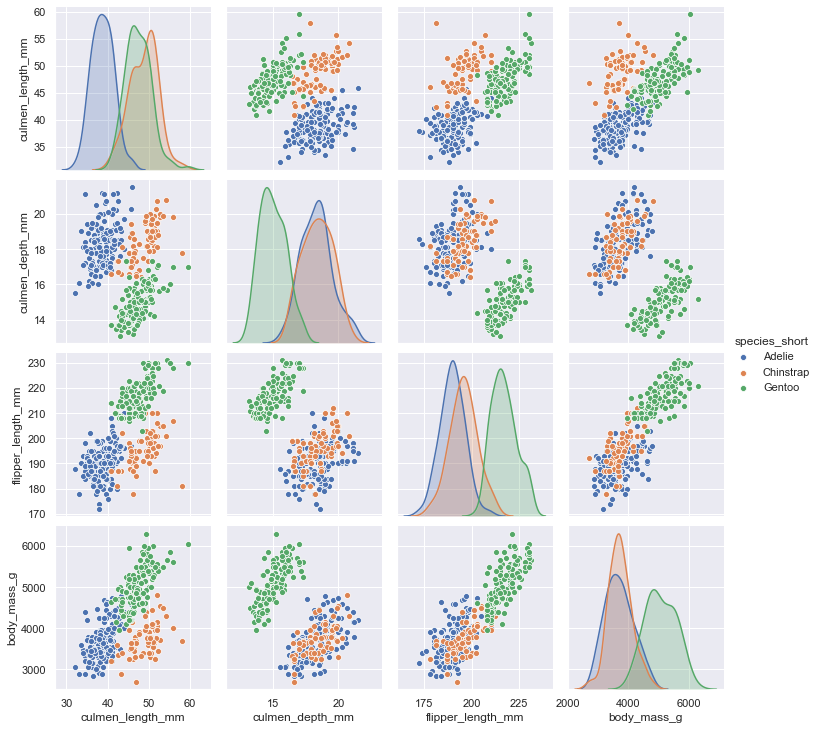

In [22]:
sns.pairplot(penguins, hue = 'species_short')

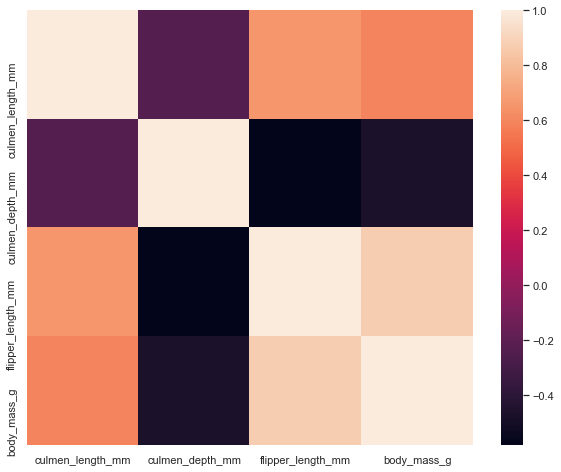

In [9]:
sns.heatmap(penguins.corr()) # From anapss. Creates a heatmap of the correlation coefficients of the features in the data

**3. New dataset with scaled values**

Things to note when applying the `StandardScaler`:
- It only works on numerical values
- It requires that data is cleaned of missing values


In [58]:
# Solution 1: Convert all categorical columns to index before scaling

from sklearn.preprocessing import StandardScaler # Import scaler

scaler = StandardScaler() # Load scaler

penguins_clean = penguins.loc[penguins['sex'] != '.', :] # Removes observations with '.' in the sex variable.
penguins_reindex = penguins_clean.set_index(['species_short', 'island', 'sex']).copy() # Creates a copy of the dataset with the categorical columns as index (that way they are not treated as features)
penguins_dropna = penguins_reindex.dropna() # Removing missing values
penguins_scaled = scaler.fit_transform(penguins_dropna) # Apply scaler

penguins_scaled

array([[-0.88290872,  0.78276694, -1.41564362, -0.561437  ],
       [-0.80964185,  0.12394677, -1.05938201, -0.4990246 ],
       [-0.66310812,  0.42801762, -0.41811113, -1.18556092],
       ...,
       [ 1.18688028, -0.73758731,  1.50570154,  1.93505872],
       [ 0.234411  , -1.19369358,  0.79317833,  1.2485224 ],
       [ 1.09529669, -0.53487341,  0.86443065,  1.49817197]])

In [94]:
# Solution 2: Apply scaler directly on numerical columns

from sklearn.preprocessing import StandardScaler # Import scaler

scaler = StandardScaler() # Load scaler

penguins_clean = penguins.loc[penguins['sex'] != '.', :] # Removes observations with '.' in the sex variable.
penguins_dropna = penguins_clean.dropna().reset_index(drop = True) # Removes missing values and resets index
penguins_scaled = penguins_dropna.copy() # Creates a copy of the df
penguins_scaled.loc[:, penguins_scaled.dtypes == 'float64'] = scaler.fit_transform(penguins_scaled.loc[:, penguins_scaled.dtypes == 'float64']) # Applying scaler on just numerical columns

penguins_scaled

species_short     island  culmen_length_mm  culmen_depth_mm  \
0          Adelie  Torgersen           -0.8960           0.7807   
1          Adelie  Torgersen           -0.8228           0.1196   
2          Adelie  Torgersen           -0.6763           0.4247   
3          Adelie  Torgersen           -1.3356           1.0859   
4          Adelie  Torgersen           -0.8594           1.7470   
..            ...        ...               ...              ...   
328        Gentoo     Biscoe            0.5874          -1.7621   
329        Gentoo     Biscoe            0.5141          -1.4570   
330        Gentoo     Biscoe            1.1734          -0.7450   
331        Gentoo     Biscoe            0.2211          -1.2027   
332        Gentoo     Biscoe            1.0818          -0.5416   

     flipper_length_mm  body_mass_g     sex  
0              -1.4268      -0.5685    MALE  
1              -1.0695      -0.5063  FEMALE  
2              -0.4264      -1.1904  FEMALE  
3              -0.5693      -0.9416  FEMALE  
4              -0.7837      -0.6929    MALE  
..                 ...          ...     ...  
328             0.9313       0.8930  FEMALE  
329             1.0027       0.7997  FEMALE  
330             1.5029       1.9191    MALE  
331             0.7884       1.2350  FEMALE  
332             0.8598       1.4837    MALE  

[333 rows x 7 columns]

In [95]:
# Describing the new scaled dataset

## Removing scientific notation from print (from jakolatho)
import numpy as np

np.set_printoptions(precision=None, suppress=True) # Removes scientific notation
pd.options.display.float_format = '{:.4f}'.format

penguins_scaled.describe()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count          333.0000         333.0000           333.0000     333.0000
mean             0.0000           0.0000             0.0000       0.0000
std              1.0015           1.0015             1.0015       1.0015
min             -2.1780          -2.0673            -2.0699      -1.8744
25%             -0.8228          -0.7959            -0.7837      -0.8172
50%              0.0929           0.0687            -0.2835      -0.1953
75%              0.8437           0.7807             0.8598       0.7064
max              2.8582           2.2047             2.1460       2.6031

**4. PCA analysis**

In [98]:
from sklearn.decomposition import PCA # Import the model
from matplotlib import pyplot as plt

penguins_scaled_numerical = penguins_scaled.loc[:, penguins_scaled.dtypes == 'float64'] # Subset numerical columns for PCA

model = PCA() # Load the model

model.fit(penguins_scaled_numerical) # Fit the model on numerical columns

penguins_reduced = model.transform(penguins_scaled_numerical) # Transform data accoding to model

penguins_reduced = pd.DataFrame(penguins_reduced, columns = ['PC1', 'PC2', 'PC3', 'PC4']) # Converts PC values to df
penguins_pca = pd.merge(penguins_scaled, penguins_reduced, left_index = True, right_index = True) # Adds PC columns to data

In [97]:
penguins_pca

species_short     island  culmen_length_mm  culmen_depth_mm  \
0          Adelie  Torgersen           -0.8960           0.7807   
1          Adelie  Torgersen           -0.8228           0.1196   
2          Adelie  Torgersen           -0.6763           0.4247   
3          Adelie  Torgersen           -1.3356           1.0859   
4          Adelie  Torgersen           -0.8594           1.7470   
..            ...        ...               ...              ...   
328        Gentoo     Biscoe            0.5874          -1.7621   
329        Gentoo     Biscoe            0.5141          -1.4570   
330        Gentoo     Biscoe            1.1734          -0.7450   
331        Gentoo     Biscoe            0.2211          -1.2027   
332        Gentoo     Biscoe            1.0818          -0.5416   

     flipper_length_mm  body_mass_g     sex     PC1     PC2     PC3     PC4  
0              -1.4268      -0.5685    MALE -1.8536  0.0321 -0.2349  0.5284  
1              -1.0695      -0.5063  FEMALE -1.3163 -0.4435 -0.0275  0.4017  
2              -0.4264      -1.1904  FEMALE -1.3766 -0.1612  0.1897 -0.5287  
3              -0.5693      -0.9416  FEMALE -1.8853 -0.0124 -0.6289 -0.4729  
4              -0.7837      -0.6929    MALE -1.9200  0.8176 -0.7011 -0.1964  
..                 ...          ...     ...     ...     ...     ...     ...  
328             0.9313       0.8930  FEMALE  1.9977 -0.9768  0.3794  0.1609  
329             1.0027       0.7997  FEMALE  1.8327 -0.7845  0.2408 -0.0090  
330             1.5029       1.9191    MALE  2.7515  0.2666 -0.4193  0.2363  
331             0.7884       1.2350  FEMALE  1.7139 -0.7259 -0.2628  0.3300  
332             0.8598       1.4837    MALE  2.0185  0.3366 -0.1553  0.4388  

[333 rows x 11 columns]

**5. Investigating explained variance (from jacobo)**

Text(0, 0.5, 'Variance')

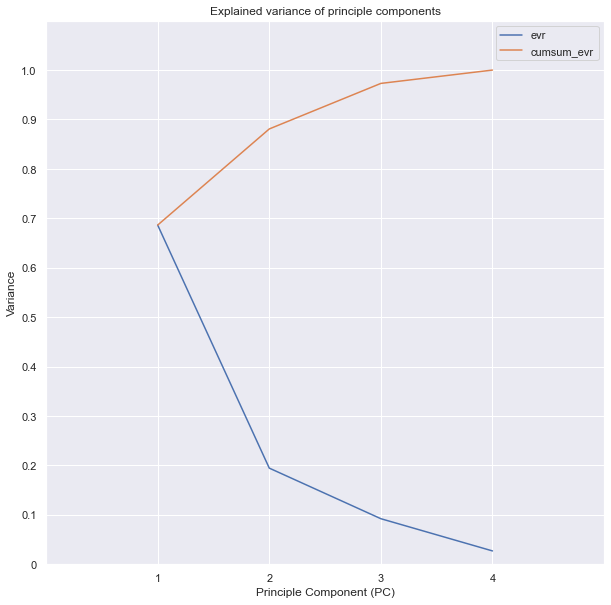

In [76]:
# Construct a plot over the variance
plot_data = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack()

# Sets figure parameters for plot.
sns.set(rc={'figure.figsize':(10,10)})

#Creates a line plot of the variance and cumulative variance.
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0)+1, hue=plot_data.index.get_level_values(1))

# Makes the plot look "nice".
plt.title('Explained variance of principle components')
plt.axis([0, 5, 0, 1.1])
plt.xticks([1, 2, 3, 4], [1, 2, 3, 4])
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.xlabel('Principle Component (PC)')
plt.ylabel('Variance')

The figure above shows that the first component explains approx. 69 % of the total variance and the second explains about 20 %.

**6. Plot the data in the space of te first two components**

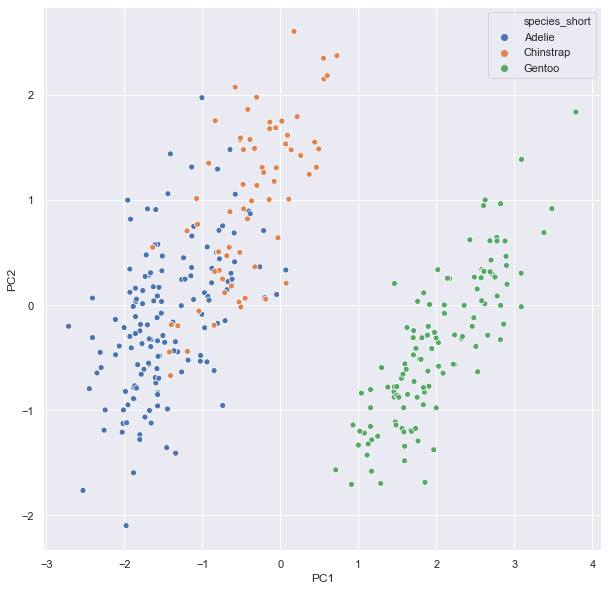

In [100]:
sns.scatterplot(data = penguins_pca, x = 'PC1', y = 'PC2', hue = 'species_short') # Coloured by species

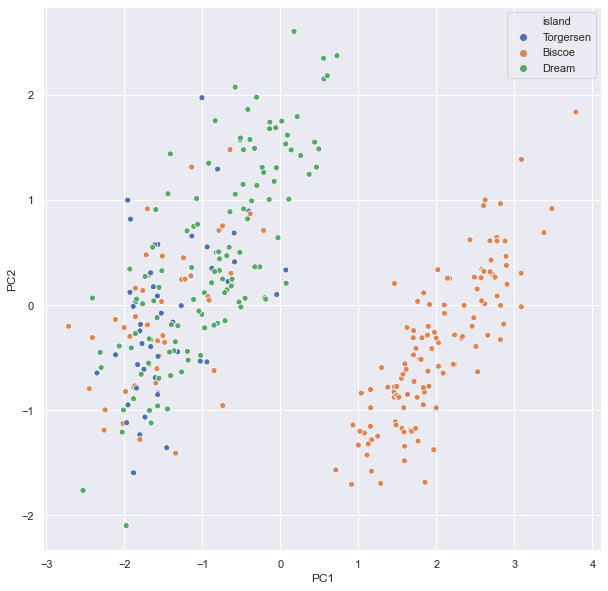

In [101]:
sns.scatterplot(data = penguins_pca, x = 'PC1', y = 'PC2', hue = 'island') # Coloured by island

**7. Inspect correlation between components and associated variables (from jacbo)**

[Text(0, 0.5, 'culmen_length_mm'),
 Text(0, 1.5, 'culmen_depth_mm'),
 Text(0, 2.5, 'flipper_length_mm'),
 Text(0, 3.5, 'body_mass_g')]

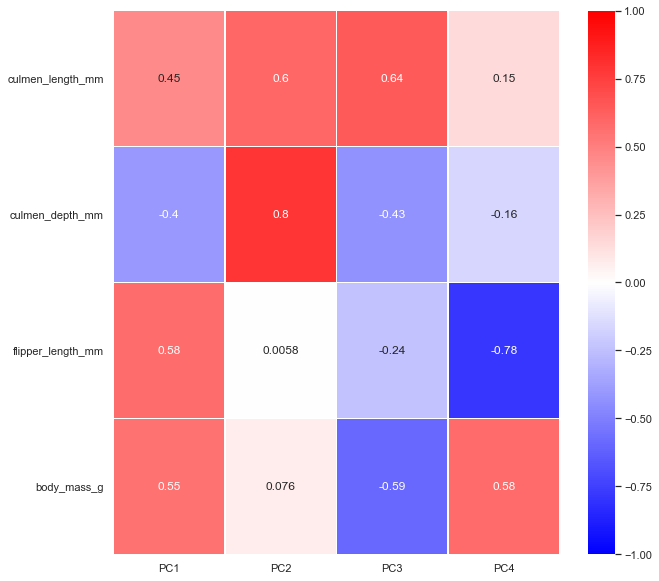

In [102]:
# Extracting component scores and loadings from the model for plotting.

pcscores = pd.DataFrame(penguins_reduced) # Component scores from reduced matrix.
loadings = pd.DataFrame(model.components_, columns=penguins_scaled_numerical.columns) # Loadings from model.
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))] # Assigns component numbers as index to loadings.

ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="bwr", vmin=-1, vmax=1, annot=True)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

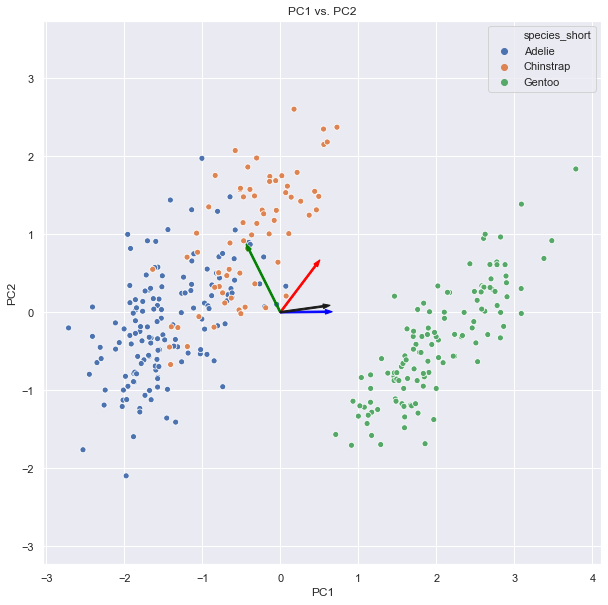

In [108]:
# Construct a scatter plot of the first 2 components
sns.scatterplot(data = penguins_pca, x = 'PC1', y = 'PC2', hue = 'species_short')

# Makes the plot look "nice".
plt.axis('equal')
plt.title('PC1 vs. PC2')
plt.xlabel("PC1")
plt.ylabel("PC2")

# Adds the loadings as arrows to the plot.
plt.arrow(0, 0, loadings['culmen_length_mm'][0], loadings['culmen_length_mm'][1], color = "red", width=0.02)
plt.arrow(0, 0, loadings['culmen_depth_mm'][0], loadings['culmen_depth_mm'][1], color = "green", width=0.02)
plt.arrow(0, 0, loadings['flipper_length_mm'][0], loadings['flipper_length_mm'][1], color = "blue", width=0.02)
plt.arrow(0, 0, loadings['body_mass_g'][0], loadings['body_mass_g'][1], color = "k", width=0.02)

# Shows the plot
plt.show()

From jacobo: 

"In this figure, we can see how the variables influence the position of the points in the component space, and which variables can give ample separation. Each variable is plotted as a vector depicting its loading in the corresponding component space. The variables have the following colors:
- **Red**: Culmen length in mm
- **Green**: Culmen depth in mm
- **Blue**: Flipper length in mm
- **Black**: Body mass in g

As we could see previously from the pairplots of the variables, Gentoo penguins were generally larger than Chinstrap and Adelie penguins, and they also had longer flippers. As such, it is not surprising that the relatively large positive loadings on PC1 (body mass: 0.55; flipper length: 0.58) can separate Gentoo from the other penguins. Even though culmen depth has a negative loading on PC1 (-0.4) and culment depth a  positive loading on PC1 (0.45), both of these have a positive loading on PC2 (culmen depth: 0.8; culmen length(0.6), which results in poor separation of Chinstrap to Adelie.

However, when looking at the PC1 vs. PC3 space, these variables are body mass and flipper length have similar directionality and loadings on PC1 and PC3, while culmen depth and culmen length are now almost completely in opposite directions. Thus, it is possible to separate all three groups of penguins adequately from each other in the PC1 vs. PC3 space, as Gentoo penguins have a higher weight and flipper length than the other species, and chinstrap penguins have a larger culmen depth than Adelie penguins."

---

## Clustering

I have created a larger set of variables from the Danish Value Study from 1999. You can find data here:

https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/value99.csv

In all examples, values towards 1 is agree a lot and values towards 5 is disagree a lot.

As an example: "Does not want alchoholics as neighbors" --> 1=does not want, 2=doesnt care

Or: Trust to the military --> 1=Trust very much, 2= Trust some, 3=Trust a little 4=Does not trust at all 

[![2hAEhX.md.png](https://iili.io/2hAEhX.md.png)](https://freeimage.host/i/2hAEhX)

Pick some varibles you think is interesting and play with creating clusters. Can we explain what is going on?

In [109]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score
import seaborn as sns

In [110]:
df = pd.read_csv('https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/value99.csv')

In [111]:
# Inspecting data

df.head()

v7  v9 v10  v14 v56 v57 v58 v59 v60 v61  ... v261 v262 v263 v264 v265 v266  \
0   2   1   1    1   1   1   1   2   2   4  ...    3    2    2    1    4    4   
1   1   1   2    0   1   1   2   2   1   1  ...    1    1    2    2    2    1   
2   1   1   2    0   1   1   1   1   1   2  ...    2    2    2    1    2    2   
3   2   1   1    1   .   1   1   2   2   2  ...    2    3    2    2    4    3   
4   1   1   2    0   1   1   2   1   3   3  ...    3    4    4    4    4    3   

  v267 v268 v269 bald  
0    3    2    2   48  
1    2    2    1   30  
2    2    1    1   57  
3    3    3    2   55  
4    3    2    4   27  

[5 rows x 91 columns]

In [113]:
df.columns

Index(['v7', 'v9', 'v10', 'v14', 'v56', 'v57', 'v58', 'v59', 'v60', 'v61',
       'v104', 'v105', 'v106', 'v107', 'v108', 'v109', 'v110', 'v111', 'v112',
       'v113', 'v114', 'v115', 'v116', 'v123', 'v124', 'v125', 'v126', 'v127',
       'v128', 'v129', 'v130', 'v131', 'v132', 'v133', 'v134', 'v135', 'v136',
       'v137', 'v138', 'v170', 'v171', 'v172', 'v173', 'v174', 'v175', 'v176',
       'v179', 'v180', 'v182', 'v188', 'v189', 'v190', 'v191', 'v192', 'v193',
       'v194', 'v195', 'v196', 'v197', 'v198', 'v199', 'v200', 'v201', 'v202',
       'v203', 'v220', 'v221', 'v222', 'v223', 'v224', 'v225', 'v226', 'v227',
       'v228', 'v229', 'v230', 'v256', 'v257', 'v258', 'v259', 'v260', 'v261',
       'v262', 'v263', 'v264', 'v265', 'v266', 'v267', 'v268', 'v269', 'bald'],
      dtype='object')

**Cleaning data**

The data uses "." to denote missing. These have to be set as missing.


In [117]:
# Solution 1: Replace using dictionary

df = df.replace({'.': np.nan})
df.head()

v7  v9 v10  v14  v56 v57 v58 v59 v60 v61  ... v261 v262 v263 v264 v265  \
0   2   1   1    1    1   1   1   2   2   4  ...    3    2    2    1    4   
1   1   1   2    0    1   1   2   2   1   1  ...    1    1    2    2    2   
2   1   1   2    0    1   1   1   1   1   2  ...    2    2    2    1    2   
3   2   1   1    1  NaN   1   1   2   2   2  ...    2    3    2    2    4   
4   1   1   2    0    1   1   2   1   3   3  ...    3    4    4    4    4   

  v266 v267 v268 v269 bald  
0    4    3    2    2   48  
1    1    2    2    1   30  
2    2    2    1    1   57  
3    3    3    3    2   55  
4    3    3    2    4   27  

[5 rows x 91 columns]

In [118]:
# Solution 2: Set missing values when importing data (from elisabethgronhoj)

missing_values = ["."]
df = pd.read_csv('https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/value99.csv', 
                   na_values = missing_values)

df.head()

v7  v9    v10  v14    v56    v57    v58    v59    v60    v61  ...   v261  \
0   2   1 1.0000    1 1.0000 1.0000 1.0000 2.0000 2.0000 4.0000  ... 3.0000   
1   1   1 2.0000    0 1.0000 1.0000 2.0000 2.0000 1.0000 1.0000  ... 1.0000   
2   1   1 2.0000    0 1.0000 1.0000 1.0000 1.0000 1.0000 2.0000  ... 2.0000   
3   2   1 1.0000    1    nan 1.0000 1.0000 2.0000 2.0000 2.0000  ... 2.0000   
4   1   1 2.0000    0 1.0000 1.0000 2.0000 1.0000 3.0000 3.0000  ... 3.0000   

    v262   v263   v264   v265   v266   v267   v268   v269  bald  
0 2.0000 2.0000 1.0000 4.0000 4.0000 3.0000 2.0000 2.0000    48  
1 1.0000 2.0000 2.0000 2.0000 1.0000 2.0000 2.0000 1.0000    30  
2 2.0000 2.0000 1.0000 2.0000 2.0000 2.0000 1.0000 1.0000    57  
3 3.0000 2.0000 2.0000 4.0000 3.0000 3.0000 3.0000 2.0000    55  
4 4.0000 4.0000 4.0000 4.0000 3.0000 3.0000 2.0000 4.0000    27  

[5 rows x 91 columns]

In [134]:
df = df.dropna() # Removing missing values

**Perform clustering**

The clustering will be performed on the neighbor variables (v104-v116).

In [139]:
neighbor_vars = [(lambda x: "v" + str(x))(x) for x in range(104, 117)]

X = df.loc[:, neighbor_vars]

linked = linkage(X, 'ward')

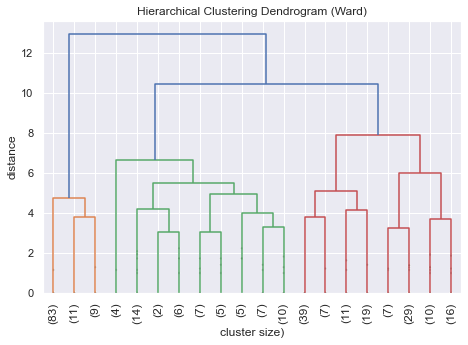

In [140]:
# Dendogram

figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linked,
    truncate_mode='lastp',
    p=20, #only show me 20 cluster
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('cluster size)')
plt.ylabel('distance')
plt.show()

In [141]:
for k in range(2,11):
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward').fit(X)
    labels=cluster.labels_
    dbs=davies_bouldin_score(X, labels)
    dbs=round(dbs,2)
    ch = metrics.calinski_harabasz_score(X, labels)
    ch=round(ch,2)
    ss=metrics.silhouette_score(X, labels, metric='euclidean')
    ss=round(ss,2)
    print("Cluster count-", k, "|", " db score-", dbs, "|", " ch score - ", ch, "|", " ss score - ", ss)
    k=str(k)
    df['cluster'+k]=labels

Cluster count- 2 |  db score- 1.38 |  ch score -  72.91 |  ss score -  0.25
Cluster count- 3 |  db score- 1.78 |  ch score -  71.34 |  ss score -  0.3
Cluster count- 4 |  db score- 1.72 |  ch score -  65.13 |  ss score -  0.34
Cluster count- 5 |  db score- 1.56 |  ch score -  60.12 |  ss score -  0.35
Cluster count- 6 |  db score- 1.47 |  ch score -  56.75 |  ss score -  0.37
Cluster count- 7 |  db score- 1.59 |  ch score -  54.33 |  ss score -  0.39
Cluster count- 8 |  db score- 1.55 |  ch score -  52.52 |  ss score -  0.41
Cluster count- 9 |  db score- 1.55 |  ch score -  51.43 |  ss score -  0.42
Cluster count- 10 |  db score- 1.51 |  ch score -  50.81 |  ss score -  0.47




... and the results for 2 clusters are!
cluster2      0      1
v256     2.3700 2.4300
v257     2.3400 2.3500
v258     2.2000 2.0400
v259     2.7500 2.7300
v260     2.6000 2.5500
v261     1.8500 1.8300
v262     2.5200 2.4600
v263     2.4600 2.3800
v264     2.2800 2.2500
v265     2.9400 2.9100
v266     2.3500 2.4100
v267     2.3000 2.1900
v268     2.2700 2.1300
v269     2.1100 1.9900


And the size of the clusters if there are 2 clusters are
cluster2
0    198
1    103
Name: v7, dtype: int64

And if we have 2 clusters, the dendrogram looks like


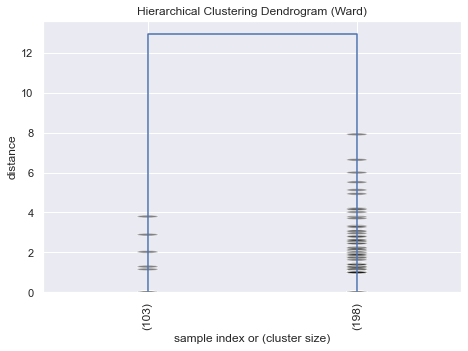



... and the results for 3 clusters are!
cluster2      0      1
v256     2.3700 2.4300
v257     2.3400 2.3500
v258     2.2000 2.0400
v259     2.7500 2.7300
v260     2.6000 2.5500
v261     1.8500 1.8300
v262     2.5200 2.4600
v263     2.4600 2.3800
v264     2.2800 2.2500
v265     2.9400 2.9100
v266     2.3500 2.4100
v267     2.3000 2.1900
v268     2.2700 2.1300
v269     2.1100 1.9900


And the size of the clusters if there are 3 clusters are
cluster3
0    138
1    103
2     60
Name: v7, dtype: int64

And if we have 3 clusters, the dendrogram looks like


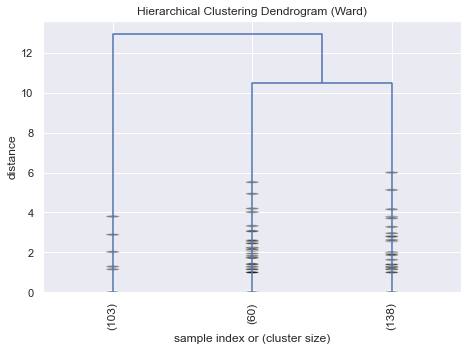



... and the results for 4 clusters are!
cluster2      0      1
v256     2.3700 2.4300
v257     2.3400 2.3500
v258     2.2000 2.0400
v259     2.7500 2.7300
v260     2.6000 2.5500
v261     1.8500 1.8300
v262     2.5200 2.4600
v263     2.4600 2.3800
v264     2.2800 2.2500
v265     2.9400 2.9100
v266     2.3500 2.4100
v267     2.3000 2.1900
v268     2.2700 2.1300
v269     2.1100 1.9900


And the size of the clusters if there are 4 clusters are
cluster4
0     60
1     76
2     62
3    103
Name: v7, dtype: int64

And if we have 4 clusters, the dendrogram looks like


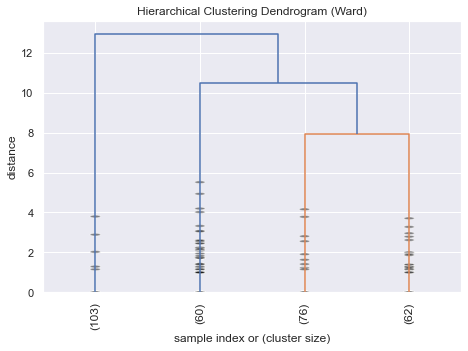



... and the results for 5 clusters are!
cluster2      0      1
v256     2.3700 2.4300
v257     2.3400 2.3500
v258     2.2000 2.0400
v259     2.7500 2.7300
v260     2.6000 2.5500
v261     1.8500 1.8300
v262     2.5200 2.4600
v263     2.4600 2.3800
v264     2.2800 2.2500
v265     2.9400 2.9100
v266     2.3500 2.4100
v267     2.3000 2.1900
v268     2.2700 2.1300
v269     2.1100 1.9900


And the size of the clusters if there are 5 clusters are
cluster5
0     62
1     76
2     56
3    103
4      4
Name: v7, dtype: int64

And if we have 5 clusters, the dendrogram looks like


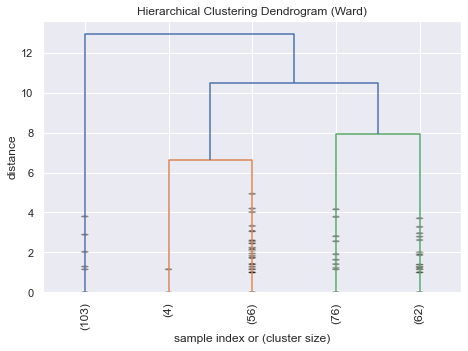

In [148]:
# Calculate characteristics of different cluster constellations
for i in range(2,6):
    i = str(i)
    X = df.loc[:, ['cluster'+i] + neighbor_vars]
    X_grouped = X.groupby(['cluster'+i]).mean()
    grouped_transposed = X_grouped.T
    ts=round(trans_stuff,2)
    print('\n\n... and the results for' ,i, 'clusters are!')	
    print(ts)
    print("\n")
    count=df.groupby(['cluster'+i])['v7'].count()
    print("And the size of the clusters if there are",i, "clusters are")
    print(count)
    print("\nAnd if we have",i,"clusters, the dendrogram looks like")
    i=int(i)
    figure = plt.figure(figsize=(7.5, 5))
    dendrogram(
            linked,
        truncate_mode='lastp',  # show only the last p merged clusters
        p=i,  # show only the last p merged clusters
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=True,  # to get a distribution impression in truncated branches
    )
    plt.title('Hierarchical Clustering Dendrogram (Ward)')
    plt.xlabel('sample index or (cluster size)')
    plt.ylabel('distance')
    plt.show()

---

## Supervised machine learning with penguins

This assignment uses the same data as for "unsupervised machine learning with penguins". 

If you created solutions for "unsupervised machine learning with penguins", jump to assignment 3.

### The assignment

1. Inspect the data with some of the standard functions you learned so far (desc, info etc.). What do we have here?
2. Likewise, use some standard visualizations (eg. from seaborn) to express some properties of the data
3. Apply stanbdard preprocessing (eg. missing values, scaling, outliers, one-hot-encoding)
4. Split the data in a train & test sample
5. Fit a classification model (target outcome = 'species') on the training data, and evaluate its performance on the test data.
   * Use first a logistic regression to do so.
   * Then, use 2-3 more complex model classes of your choice.

In [ ]:
# standard packaging

import pandas as pd
import seaborn as sns
sns.set(color_codes=True, rc={'figure.figsize':(10,8)})

from IPython.display import HTML #Youtube embed

In [153]:
# load the dataset from GitHub - original source

penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

**3. Apply standard preprocessing**

In [156]:
penguins['sex'] = penguins['sex'].replace({'.': np.nan}) # Replacing . with missing
penguins_dropna = penguins.dropna() # Removing missing
penguins_dummies = pd.get_dummies(penguins_dropna, columns = ['island', 'sex'])
penguins_dummies.head()

species_short  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0        Adelie           39.1000          18.7000           181.0000   
1        Adelie           39.5000          17.4000           186.0000   
2        Adelie           40.3000          18.0000           195.0000   
4        Adelie           36.7000          19.3000           193.0000   
5        Adelie           39.3000          20.6000           190.0000   

   body_mass_g  island_Biscoe  island_Dream  island_Torgersen  sex_FEMALE  \
0    3750.0000              0             0                 1           0   
1    3800.0000              0             0                 1           1   
2    3250.0000              0             0                 1           1   
4    3450.0000              0             0                 1           1   
5    3650.0000              0             0                 1           0   

   sex_MALE  
0         1  
1         0  
2         0  
4         0  
5         1

In [162]:
# Select dependent variable
y = penguins_dummies['species_short']

# Select independent variables
X = penguins_dummies.loc[:, penguins_dummies.columns != 'species_short']

# Encode labels for Y
from sklearn.preprocessing import LabelEncoder # Import encoder
encoder = LabelEncoder() # Load encoder

y_enc = encoder.fit_transform(y)

# Standard scale X
from sklearn.preprocessing import StandardScaler # Import scaler
scaler = StandardScaler() # Load scaler

X_scaled = scaler.fit_transform(X) # Apply the scaler to our X-features

**4. Split the data in test and training set**

In [211]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_enc, test_size = 0.2, random_state = 12)

**5a. Fit a classification model (logreg)**

In [212]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [213]:
# Import and instantiate the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)

# K-fold cross-validation (splitting the 80% into 5 chunks, using 4 to train and 1 to evaluate)
scores = cross_val_score(model, X_train, y_train, cv = 5)
chunk_scores = list(zip(range(1,6), scores))
for chunk_score in chunk_scores:
    print(f"Chunk {chunk_score[0]} has score {chunk_score[1]}")

Chunk 1 has score 1.0
Chunk 2 has score 0.9811320754716981
Chunk 3 has score 1.0
Chunk 4 has score 0.9811320754716981
Chunk 5 has score 1.0


In [214]:
# Model training
model.fit(X_train, y_train)

# Model performance on the test-set
print(model.score(X_test, y_test))

1.0


In [215]:
# Performance evaluation using the classification_report

target_names = encoder.inverse_transform(list(set(y_test))) # Get labels back

y_pred = model.predict(X_test) # Predict from test set

print(classification_report(y_test, y_pred, target_names = target_names)) #Print out the reportb

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        27
   Chinstrap       1.00      1.00      1.00         4
      Gentoo       1.00      1.00      1.00        36

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x17696fc6d00>)

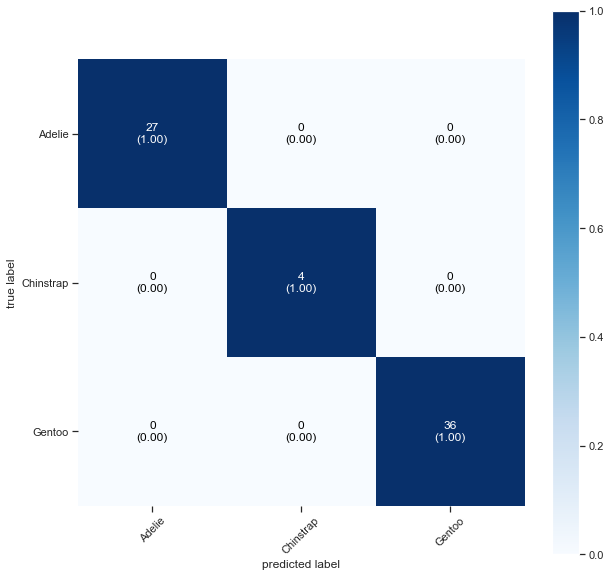

In [219]:
# Investigating confusion matrix (plotting predicted against true label)

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                hide_spines = True,
                                class_names=target_names)

**5b. Fit a classification model (random forest) (from julger)**

In [220]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

model.fit(X_train, y_train)
print(model.score(X_test, y_test))

[1.         0.98113208 1.         0.98113208 1.        ]
1.0


In [221]:
# Performance evaluation using the classification_report

target_names = encoder.inverse_transform(list(set(y_test))) # get real region names back using inverse_transform

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred, target_names=target_names)) #Print out the report

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        27
   Chinstrap       1.00      1.00      1.00         4
      Gentoo       1.00      1.00      1.00        36

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x176944e0970>)

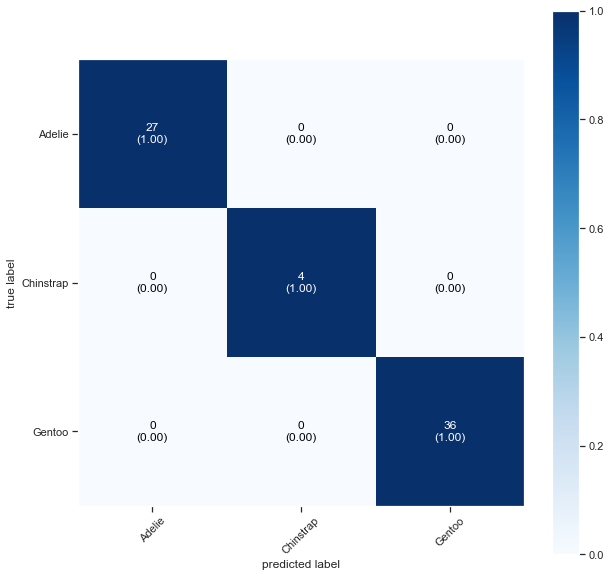

In [222]:
# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names = target_names)

## Employee turnover

### The assignment

In the repo, you will find a dataset describing employee turnover in a company.

https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/turnover.csv

The dataset contains data collected in an employee survey and enriched with HR data.

The variable `churn` tells us if the employee left the company in the past 3 months. The other variables are collected

#### Classification

Try to predict `churn` using a classification pipeline (perhaps add some simple exploration of the data first)

#### Regression
Try to predict the number of weekly average hours worked.

**Before** working with the data, you should use `pd.get_dummies` to get dummies for categorical variables.

**Import data**

In [234]:
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(10,10)})

df = pd.read_csv('https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/turnover.csv') # Load data

In [235]:
df.head()

satisfaction  evaluation  number_of_projects  average_montly_hours  \
0        0.3800      0.5300                   2                   157   
1        0.8000      0.8600                   5                   262   
2        0.1100      0.8800                   7                   272   
3        0.7200      0.8700                   5                   223   
4        0.3700      0.5200                   2                   159   

   time_spend_company  work_accident  churn  promotion department  salary  
0                   3              0      1          0      sales     low  
1                   6              0      1          0      sales  medium  
2                   4              0      1          0      sales  medium  
3                   5              0      1          0      sales     low  
4                   3              0      1          0      sales     low

In [236]:
# Convert categorical to dummies

df = pd.get_dummies(df, columns = ['department', 'salary'])

df.head()

satisfaction  evaluation  number_of_projects  average_montly_hours  \
0        0.3800      0.5300                   2                   157   
1        0.8000      0.8600                   5                   262   
2        0.1100      0.8800                   7                   272   
3        0.7200      0.8700                   5                   223   
4        0.3700      0.5200                   2                   159   

   time_spend_company  work_accident  churn  promotion  department_IT  \
0                   3              0      1          0              0   
1                   6              0      1          0              0   
2                   4              0      1          0              0   
3                   5              0      1          0              0   
4                   3              0      1          0              0   

   department_RandD  ...  department_hr  department_management  \
0                 0  ...              0                      0   
1                 0  ...              0                      0   
2                 0  ...              0                      0   
3                 0  ...              0                      0   
4                 0  ...              0                      0   

   department_marketing  department_product_mng  department_sales  \
0                     0                       0                 1   
1                     0                       0                 1   
2                     0                       0                 1   
3                     0                       0                 1   
4                     0                       0                 1   

   department_support  department_technical  salary_high  salary_low  \
0                   0                     0            0           1   
1                   0                     0            0           0   
2                   0                     0            0           0   
3                   0                     0            0           1   
4                   0                     0            0           1   

   salary_medium  
0              0  
1              1  
2              1  
3              0  
4              0  

[5 rows x 21 columns]

In [237]:
# Select dependent and independent variables

y = df['churn']
X = df.loc[:, df.columns != 'churn']

**Transform, preprocess, split**

In [250]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Apply the scaler to our X-features
X_scaled = scaler.fit_transform(X)

# Split the data using the train_test_split module. We keep 20% of the data for testing and use 80% to train the model
# Random state defined with an arbitrary number for reproducibility

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

**Train and evaluate using logistic regression**

In [251]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)

In [252]:
# K-fold cross-validation (splitting the 80% into 5 chunks, using 4 to train and 1 to evaluate)
scores = cross_val_score(model, X_train, y_train, cv = 5)
chunk_scores = list(zip(range(1,6), scores))
for chunk_score in chunk_scores:
    print(f"Chunk {chunk_score[0]} has score {chunk_score[1]}")

Chunk 1 has score 0.7858333333333334
Chunk 2 has score 0.7925
Chunk 3 has score 0.7883333333333333
Chunk 4 has score 0.7991666666666667
Chunk 5 has score 0.7803251354731138


In [253]:
# Model training
model.fit(X_train, y_train)

# Model performance on the test-set
print(model.score(X_test, y_test))

0.7843333333333333


**Train and evaluate using random forest (from majsevnie)**

In [254]:
# Import random forest

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

[0.98958333 0.98916667 0.98791667 0.99166667 0.99041267]


In [255]:
# Model training and performance
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.988


**Predict weekly hours worked (from majsevnie)**

In [258]:
# Convert average monthly hours to average weekly hours
average_weekly_hours = df['average_montly_hours'] / 4

# Inspect new variable 
average_weekly_hours.describe()

# Add new column to dataframe
df['average_weekly_hours'] = average_weekly_hours

# Check that the column was added correctly
df.head()

satisfaction  evaluation  number_of_projects  average_montly_hours  \
0        0.3800      0.5300                   2                   157   
1        0.8000      0.8600                   5                   262   
2        0.1100      0.8800                   7                   272   
3        0.7200      0.8700                   5                   223   
4        0.3700      0.5200                   2                   159   

   time_spend_company  work_accident  churn  promotion  department_IT  \
0                   3              0      1          0              0   
1                   6              0      1          0              0   
2                   4              0      1          0              0   
3                   5              0      1          0              0   
4                   3              0      1          0              0   

   department_RandD  ...  department_management  department_marketing  \
0                 0  ...                      0                     0   
1                 0  ...                      0                     0   
2                 0  ...                      0                     0   
3                 0  ...                      0                     0   
4                 0  ...                      0                     0   

   department_product_mng  department_sales  department_support  \
0                       0                 1                   0   
1                       0                 1                   0   
2                       0                 1                   0   
3                       0                 1                   0   
4                       0                 1                   0   

   department_technical  salary_high  salary_low  salary_medium  \
0                     0            0           1              0   
1                     0            0           0              1   
2                     0            0           0              1   
3                     0            0           1              0   
4                     0            0           1              0   

   average_weekly_hours  
0               39.2500  
1               65.5000  
2               68.0000  
3               55.7500  
4               39.7500  

[5 rows x 22 columns]

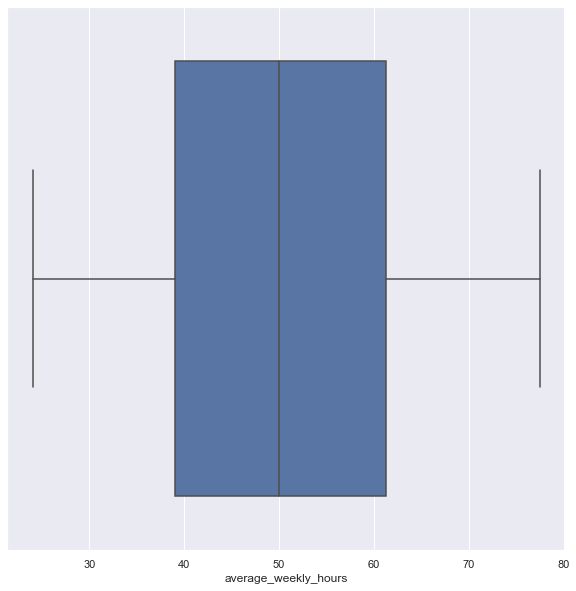

In [260]:
# Select outcome variable for regression 
y_reg = df.average_weekly_hours 

# Overview of distribution of outcome variable
sns.boxplot(df.average_weekly_hours)

In [261]:
# Create new train / test splits

X_train, X_test, y_train, y_test, data_train, data_test = train_test_split(X_scaled, y_reg, df, test_size = 0.2, random_state = 42)

In [262]:
# Import and instantiate the baseline model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set / This score is not accuracy but a R^2
print(model.score(X_test, y_test))

1.0


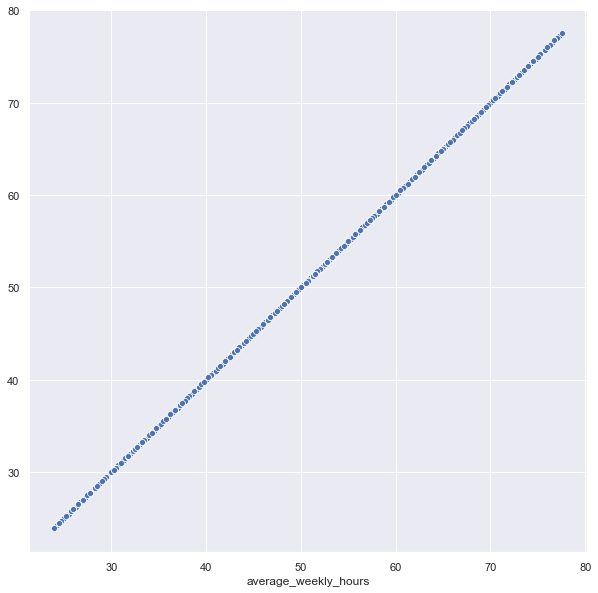

In [263]:
# We can also inspect our results visually
y_pred = model.predict(X_test)

# Display scatterploat: y_test and y_pred
sns.scatterplot(y_test,y_pred)

---

# Portfolio assignments for Wednesday

**Requirement:** Work on solutions for *either* the network analysis case study 1 or case study 2 *and* the exercise for spatial stuff.

## Network analysis: Case Study 1: Directed Networks: Friends & Foes at Work

### Introduction to the case

* Emmanuel Lazega, The Collegial Phenomenon: The Social Mechanisms of Cooperation Among Peers in a Corporate Law Partnership, Oxford University Press (2001).

#### Data 
This data set comes from a network study of corporate law partnership that was carried out in a Northeastern US corporate law firm, referred to as SG&R, 1988-1991 in New England. It includes (among others) measurements of networks among the 71 attorneys (partners and associates) of this firm, i.e. their strong-coworker network, advice network, friendship network, and indirect control networks. Various members' attributes are also part of the dataset, including seniority, formal status, office in which they work, gender, lawschool attended, individual performance measurements (hours worked, fees brought in), attitudes concerning various management policy options, etc. This dataset was used to identify social processes such as bounded solidarity, lateral control, quality control, knowledge sharing, balancing powers, regulation, etc. among peers.

#### Setting
* What do corporate lawyers do? Litigation and corporate work.
* Division of work and interdependencies.
* Three offices, no departments, built-in pressures to grow, intake and assignment rules.
* Partners and associates: hierarchy, up or out rule, billing targets.
* Partnership agreement (sharing benefits equally, 90% exclusion rule, governance structure, elusive committee system) and incompleteness of the contracts.
* Informal, unwritten rules (ex: no moonlighting, no investment in buildings, no nepotism, no borrowing to pay partners, etc.).
* Huge incentives to behave opportunistically ; thus the dataset is appropriate for the study of social processes that make cooperation among rival partners possible. 
* Sociometric name generators used to elicit coworkers, advice, and 'friendship' ties at SG&R:"Here is the list of all the members of your Firm."

The networks where created according to the follwoing questionaire:

* Strong coworkers network: "Because most firms like yours are also organized very informally, it is difficult to get a clear idea of how the members really work together. Think back over the past year, consider all the lawyers in your Firm. Would you go through this list and check the names of those with whom you have worked with. By "worked with" I mean that you have spent time together on at least one case, that you have been assigned to the same case, that they read or used your work product or that you have read or used their work product; this includes professional work done within the Firm like Bar association work, administration, etc."
* Basic advice network: "Think back over the past year, consider all the lawyers in your Firm. To whom did you go for basic professional advice? For instance, you want to make sure that you are handling a case right, making a proper decision, and you want to consult someone whose professional opinions are in general of great value to you. By advice I do not mean simply technical advice."
* 'Friendship' network:
"Would you go through this list, and check the names of those you socialize with outside work. You know their family, they know yours, for instance. I do not mean all the people you are simply on a friendly level with, or people you happen to meet at Firm functions." 

### Data preperation

#### Packages

In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import itertools # Python's amazing iteration & combination library
import networkx as nx

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
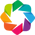

In [266]:
# Visualization defaults
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show

# Setting the default figure size a bit larger
defaults = dict(width=750, height=750, padding=0.1,
                xaxis=None, yaxis=None)
hv.opts.defaults(
    opts.EdgePaths(**defaults), opts.Graph(**defaults), opts.Nodes(**defaults))

####  Load the data

Lets load the data! The three networks refer to cowork, friendship, and advice. The first 36 respondents are the partners in the firm.

(the cell belows reads in the tables, performs some recoding and cleanup and creates network objects for the 3 data sets).

In [267]:
mat_friendship = pd.read_table("https://www.dropbox.com/s/0saiulir3pr566k/ELfriend.dat?dl=1", delim_whitespace=True, header=None) 
mat_advice = pd.read_table("https://www.dropbox.com/s/apq42n1grim23k9/ELadv.dat?dl=1", delim_whitespace=True, header=None) 
mat_work = pd.read_table("https://www.dropbox.com/s/dliz0sd7or8tv01/ELwork.dat?dl=1", delim_whitespace=True, header=None)

G_friendship = nx.from_pandas_adjacency(mat_friendship, create_using=nx.DiGraph)
G_advice = nx.from_pandas_adjacency(mat_advice, create_using=nx.DiGraph)
G_work = nx.from_pandas_adjacency(mat_work, create_using=nx.DiGraph)

attributes = pd.read_table("https://www.dropbox.com/s/qz7fvfgx8lvjgpr/ELattr.dat?dl=1", delim_whitespace=True, header=None, dtype='int') 
attributes=attributes.round().astype(int)
attributes.columns = ["id", "seniority", "gender", "office", "tenure", "age", "practice", "school"]
attributes.set_index('id',inplace=True)

cleanup_nums = {"seniority":     {1: "Partner", 2: "Associate"},
                "gender":     {1: "Male", 2: "Female"},
                "office":     {1: "Boston", 2: "Hartford", 3:"Providence"},
                "practice":     {1: "Litigation", 2: "Corporate"},
                "school":     {1: "Harvard, Yale", 2: "Ucon", 3: "Others"}
                } 
attributes.replace(cleanup_nums, inplace=True)

attributes_dict=attributes.T.to_dict()

nx.set_node_attributes(G_friendship, attributes_dict)
nx.set_node_attributes(G_advice, attributes_dict)
nx.set_node_attributes(G_work, attributes_dict)

print(nx.get_node_attributes(G_friendship, 'seniority'))

{1: 'Partner', 2: 'Partner', 3: 'Partner', 4: 'Partner', 5: 'Partner', 6: 'Partner', 7: 'Partner', 8: 'Partner', 9: 'Partner', 10: 'Partner', 11: 'Partner', 12: 'Partner', 13: 'Partner', 14: 'Partner', 15: 'Partner', 16: 'Partner', 17: 'Partner', 18: 'Partner', 19: 'Partner', 20: 'Partner', 21: 'Partner', 22: 'Partner', 23: 'Partner', 24: 'Partner', 25: 'Partner', 26: 'Partner', 27: 'Partner', 28: 'Partner', 29: 'Partner', 30: 'Partner', 31: 'Partner', 32: 'Partner', 33: 'Partner', 34: 'Partner', 35: 'Partner', 36: 'Partner', 37: 'Associate', 38: 'Associate', 39: 'Associate', 40: 'Associate', 41: 'Associate', 42: 'Associate', 43: 'Associate', 44: 'Associate', 45: 'Associate', 46: 'Associate', 47: 'Associate', 48: 'Associate', 49: 'Associate', 50: 'Associate', 51: 'Associate', 52: 'Associate', 53: 'Associate', 54: 'Associate', 55: 'Associate', 56: 'Associate', 57: 'Associate', 58: 'Associate', 59: 'Associate', 60: 'Associate', 61: 'Associate', 62: 'Associate', 63: 'Associate', 64: 'Asso

#### Calculate dimensional centralities

There might be better ways to do that (still experimenting), but for now lets first create centralities upfront for all networks. We for now only look at the in-degree.

In [268]:
cent_degree_friendship = dict(G_friendship.in_degree)
cent_degree_advice = dict(G_advice.in_degree)
cent_degree_work = dict(G_work.in_degree)

In [269]:
nx.set_node_attributes(G_friendship, cent_degree_friendship, 'cent_degree')
nx.set_node_attributes(G_advice, cent_degree_advice, 'cent_degree')
nx.set_node_attributes(G_work, cent_degree_work, 'cent_degree')

In [270]:
# Create and save a layout.
G_layout = nx.layout.kamada_kawai_layout(G_work)

In [271]:
g_plot = hv.Graph.from_networkx(G_friendship, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='seniority', cmap='Set1',
                                                                        legend_position='right'
                                                                        )

show(hv.render(g_plot))

In [272]:
g_plot = hv.Graph.from_networkx(G_advice, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='cent_degree', cmap='Set1',
                                                                        legend_position='right')
show(hv.render(g_plot))

In [273]:
g_plot = hv.Graph.from_networkx(G_work, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='seniority', cmap='Set1',
                                                                        legend_position='right')
show(hv.render(g_plot))

#### Assortiativity

We can also calculate another interested measure, particularly in social networks: Assortiativity. In a nutshell, it measures if two nodes that share certain characteristics ahve a higher or lower probability to be connected.

For details, check:

* Newman, M. E. J. (27 February 2003). "Mixing patterns in networks". Physical Review E. American Physical Society (APS). 67 (2): 026126

In [274]:
nx.attribute_assortativity_coefficient(G_friendship, 'seniority')

0.5354650209260934

In [275]:
nx.attribute_assortativity_coefficient(G_friendship, 'school')

0.019171775624653154

In [276]:
nx.attribute_assortativity_coefficient(G_friendship, 'office')

0.03651083062621187

#### Reciprocity

Anotyher interesting question usually is, if directed edges are reciptocated, meaning that an edge between `i,j` makes an edge between `j,i` more likely

In [277]:
nx.overall_reciprocity(G_friendship)

0.6121739130434782

### The assignment

Explore the network further.

1. Calculate the reciprocity for the work and advise network. Are the numbers diffetrent? Why might that be the case?
2. Identify communities in the friendship and advice network (hint: works only on undirected networks, so you might have to create an undirected graph)
3. Visualize these communities (static or dynamic)

**1. Calculate the reprocities**

In [278]:
nx.overall_reciprocity(G_work) # For work network

1.0

In [279]:
nx.overall_reciprocity(G_advice) # For advice network

0.3923766816143498

**2. Identify communities (from danbac)**

In [280]:
G_friendship_com = nx.from_pandas_adjacency(mat_friendship,create_using=nx.Graph)
G_advice_com = nx.from_pandas_adjacency(mat_advice, create_using=nx.Graph)

attributes = pd.read_table("https://www.dropbox.com/s/qz7fvfgx8lvjgpr/ELattr.dat?dl=1", delim_whitespace=True, header=None, dtype='int') 
attributes=attributes.round().astype(int)
attributes.columns = ["id", "seniority", "gender", "office", "tenure", "age", "practice", "school"]
#attributes.set_index('id',inplace=True)
#attributes.set_index('id',inplace=True) # do not set id as index
attributes.drop("id", axis=1, inplace=True) #if you want, drop id column and keep index from 0

cleanup_nums = {"seniority":     {1: "Partner", 2: "Associate"},
                "gender":     {1: "Male", 2: "Female"},
                "office":     {1: "Boston", 2: "Hartford", 3:"Providence"},
                "practice":     {1: "Litigation", 2: "Corporate"},
                "school":     {1: "Harvard, Yale", 2: "Ucon", 3: "Others"}
                } 
attributes.replace(cleanup_nums, inplace=True)

attributes_dict=attributes.T.to_dict()

nx.set_node_attributes(G_friendship, attributes_dict)
nx.set_node_attributes(G_advice, attributes_dict)

In [281]:
cent_degree_friendship = dict(G_friendship_com.degree)
cent_degree_advice = dict(G_advice_com.degree)

In [282]:
nx.set_node_attributes(G_friendship_com, cent_degree_friendship, 'cent_degree')
nx.set_node_attributes(G_advice_com, cent_degree_advice, 'cent_degree')

In [283]:
G_layout = nx.layout.kamada_kawai_layout(G_work)

In [285]:
import community

In [286]:
com_fren = community.best_partition(G_friendship_com)
com_advice = community.best_partition(G_advice_com)

In [287]:
max(com_fren.values())

5

In [288]:
max(com_advice.values())

2

**3. Visualize communities (from danbac)**

In [289]:
nx.set_node_attributes(G_friendship_com, com_fren, 'community')

g_plot = hv.Graph.from_networkx(G_friendship_com, G_layout).opts(tools=['hover'],
                                                  node_size='cent_degree', 
                                                  node_color='community', cmap=plt.cm.Set1,
                                                  legend_position='right')

show(hv.render(g_plot))

In [290]:
nx.set_node_attributes(G_advice_com, com_advice, 'community')

g_plot = hv.Graph.from_networkx(G_advice_com, G_layout).opts(tools=['hover'],
                                                  node_size='cent_degree', 
                                                  node_color='community', cmap=plt.cm.Set1,
                                                  legend_position='right')

show(hv.render(g_plot))

## Exercise for spatial stuff

So, now I have a better hypothesis; mental health has something to do with noise!

Here, you find a new geo-dataset;

- OPEN_DATA_STOEJDATA_VIEWPoint.shp

This contains information about noise at different places within municipalities. The end goal is to create a map where each point is aggregated to municipality level and we visualize where the noise is more severe. We use the column "GNSHAST071" to measure average noice at that point.

When that map is done, create a pretty map with the mental health measurement and compare the two - are there any connection between noise at an aggregated level and mental health?

Feel free to play around with types of basemaps, types of colors and all sorts of things - the goal is not to become the leading expert in making fancy maps but to have fun and learn stuff.

In [1]:
# Loading required packages

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from pyproj import Proj
import contextily as ctx
import descartes

In [2]:
# Load the data

stoejdata = gpd.read_file("OPEN_DATA_STOEJDATA_VIEWPoint.shp")
stoejdata.head()

DATAEJER  VEJBESTYRE      VEJNR VEJDEL                  VEJNAVN  KILOMETER  \
0      316       316.0  3161633.0      0  Søstrupvej, 4300 Holbæk        1.0   
1      316       316.0   300602.0      0       Slagelse-Snertinge       26.0   
2      316       316.0   300143.0      0        Elverdam-Ugerløse        7.0   
3      316       316.0   300143.0      0        Elverdam-Ugerløse        1.0   
4      316       316.0   300143.0      0        Elverdam-Ugerløse       11.0   

   METER                         LOKATION  KOMMUNE     AAR  ...  GNSHAST071  \
0  830.0  Søstrupvej ca. 170 m fra nr. 19    316.0  2019.0  ...        54.5   
1  640.0                  Ved Bromøllekro    316.0  2019.0  ...        56.3   
2  420.0                      Øst for 187    316.0  2019.0  ...        38.6   
3  656.0                    Udfor P-Lomme    316.0  2019.0  ...        71.4   
4  100.0                      Øst for 346    316.0  2019.0  ...        59.3   

   GNSHAST191  GNSHAST221  TIMEANTAL9  TIMEANTA10  TIMEANTA11  GNSHAST072  \
0        54.9        53.8         NaN         NaN         NaN        50.0   
1        57.7        60.7         7.0         2.0         3.0        57.0   
2        37.7        40.8         2.0         1.0         1.0        38.7   
3        73.9        78.2         1.0         0.0         0.0        66.2   
4        60.1        60.0         2.0         2.0         1.0        57.4   

   GNSHAST192  GNSHAST222                        geometry  
0         NaN        50.7  POINT (666785.000 6174847.000)  
1        55.5        61.0  POINT (650362.000 6165481.000)  
2        39.0        39.6  POINT (670888.000 6165624.000)  
3        77.4        74.1  POINT (675622.000 6167385.000)  
4        55.4        58.7  POINT (668085.000 6163679.000)  

[5 rows x 36 columns]

<AxesSubplot:>

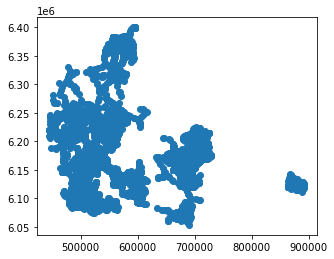

In [3]:
stoejdata.plot()

**Solution from dimoreno**

In [4]:
# Map which aggregates by municipality level and visualize where the noise is higher, noise col 'GNSHAST071'
municipalities = gpd.read_file("KOMMUNE.shp")
municipalities.head(2)

mun = municipalities.dissolve(by='KOMNAVN')
mun.head(2)

#Create a map with mental health measurement and compare the two, add basemaps

geometry  FEAT_ID  \
KOMNAVN                                                                
Aabenraa  MULTIPOLYGON Z (((532611.300 6079233.260 -999....    91071   
Aalborg   MULTIPOLYGON Z (((577131.740 6306752.540 -999....   149920   

          FEAT_KODE FEAT_TYPE FEAT_STTXT GEOM_STTXT  DAGI_ID      AREAL  \
KOMNAVN                                                                   
Aabenraa       6310   Kommune   vedtaget    endelig   389169   94061.45   
Aalborg        6310   Kommune   vedtaget    endelig   389206  113800.07   

         REGIONKODE          REGIONNAVN  ...  \
KOMNAVN                                  ...   
Aabenraa       1083   Region Syddanmark  ...   
Aalborg        1081  Region Nordjylland  ...   

                                      DQ_STATEM  \
KOMNAVN                                           
Aabenraa  Digitaliseret pba. referencemateriale   
Aalborg   Digitaliseret pba. referencemateriale   

                                      DQ_DESCR DQ_PROCESS  \
KOMNAVN                                                     
Aabenraa  Manuelt indtegnet pba. FOT/matriklen       SDFE   
Aalborg   Manuelt indtegnet pba. FOT/matriklen       SDFE   

                               DQ_RESPONS DQ_POSACPL DQ_POSACLV  TIMEOF_CRE  \
KOMNAVN                                                                       
Aabenraa  Social- og Indenrigsministeriet          1       None  2020-06-09   
Aalborg   Social- og Indenrigsministeriet          1       None  2018-11-07   

          TIMEOF_PUB TIMEOF_REV  TIMEOF_EXP  
KOMNAVN                                      
Aabenraa  2020-06-09       None  2020-11-07  
Aalborg   2018-11-07       None  2020-11-07  

[2 rows x 24 columns]

In [5]:
#reproject
no = stoejdata.to_crs(epsg=3857)
mu = mun.to_crs(epsg=3857)

In [6]:
mu.head()

geometry  FEAT_ID  \
KOMNAVN                                                                   
Aabenraa     MULTIPOLYGON Z (((1058428.620 7334572.764 -999...    91071   
Aalborg      MULTIPOLYGON Z (((1142837.507 7739311.430 -999...   149920   
Aarhus       MULTIPOLYGON Z (((1145686.388 7600233.235 -999...   150803   
Albertslund  POLYGON Z ((1376388.355 7499851.050 -999.000, ...   108994   
Allerød      POLYGON Z ((1359338.011 7525283.990 -999.000, ...   151461   

             FEAT_KODE FEAT_TYPE FEAT_STTXT GEOM_STTXT  DAGI_ID      AREAL  \
KOMNAVN                                                                      
Aabenraa          6310   Kommune   vedtaget    endelig   389169   94061.45   
Aalborg           6310   Kommune   vedtaget    endelig   389206  113800.07   
Aarhus            6310   Kommune   vedtaget    endelig   389194   47115.23   
Albertslund       6310   Kommune   vedtaget    endelig   389112    2343.66   
Allerød           6310   Kommune   vedtaget    endelig   389121    6742.52   

            REGIONKODE          REGIONNAVN  ...  \
KOMNAVN                                     ...   
Aabenraa          1083   Region Syddanmark  ...   
Aalborg           1081  Region Nordjylland  ...   
Aarhus            1082  Region Midtjylland  ...   
Albertslund       1084  Region Hovedstaden  ...   
Allerød           1084  Region Hovedstaden  ...   

                                         DQ_STATEM  \
KOMNAVN                                              
Aabenraa     Digitaliseret pba. referencemateriale   
Aalborg      Digitaliseret pba. referencemateriale   
Aarhus       Digitaliseret pba. referencemateriale   
Albertslund  Digitaliseret pba. referencemateriale   
Allerød      Digitaliseret pba. referencemateriale   

                                         DQ_DESCR DQ_PROCESS  \
KOMNAVN                                                        
Aabenraa     Manuelt indtegnet pba. FOT/matriklen       SDFE   
Aalborg      Manuelt indtegnet pba. FOT/matriklen       SDFE   
Aarhus       Manuelt indtegnet pba. FOT/matriklen       SDFE   
Albertslund  Manuelt indtegnet pba. FOT/matriklen       SDFE   
Allerød      Manuelt indtegnet pba. FOT/matriklen       SDFE   

                                  DQ_RESPONS DQ_POSACPL DQ_POSACLV  \
KOMNAVN                                                              
Aabenraa     Social- og Indenrigsministeriet          1       None   
Aalborg      Social- og Indenrigsministeriet          1       None   
Aarhus       Social- og Indenrigsministeriet          1       None   
Albertslund  Social- og Indenrigsministeriet          1       None   
Allerød      Social- og Indenrigsministeriet          1       None   

             TIMEOF_CRE  TIMEOF_PUB TIMEOF_REV  TIMEOF_EXP  
KOMNAVN                                                     
Aabenraa     2020-06-09  2020-06-09       None  2020-11-07  
Aalborg      2018-11-07  2018-11-07       None  2020-11-07  
Aarhus       2018-06-28  2018-06-28       None  2020-11-07  
Albertslund  2020-08-27  2020-08-27       None  2020-11-07  
Allerød      2018-01-22  2018-01-22       None  2020-11-07  

[5 rows x 24 columns]

In [7]:
#Aggregate
mu_no = gpd.sjoin(no, mu, how="right", op='within')
mu_no.info(verbose=False)
mu_no.head(5)

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 7754 entries, Aabenraa to Ærø
Columns: 60 entries, index_left to TIMEOF_EXP
dtypes: float64(33), geometry(1), int64(3), object(23)
memory usage: 3.6+ MB


index_left DATAEJER  VEJBESTYRE      VEJNR VEJDEL       VEJNAVN  \
KOMNAVN                                                                     
Aabenraa      3483.0      580       580.0  5191035.0      1      Bytoften   
Aabenraa       106.0      580       580.0  5194079.0      0  Krusmøllevej   
Aabenraa      5396.0      580       580.0  5197220.0      0    Strandgade   
Aabenraa       103.0      580       580.0  5197220.0      0    Strandgade   
Aabenraa      2729.0      580       580.0   500520.0      0  Flensborgvej   

          KILOMETER  METER   LOKATION  KOMMUNE  ...  \
KOMNAVN                                         ...   
Aabenraa        0.0   95.0     Bovrup    580.0  ...   
Aabenraa        0.0  950.0  Krusmølle    580.0  ...   
Aabenraa        0.0  450.0  Krusmølle    580.0  ...   
Aabenraa        0.0  125.0  Krusmølle    580.0  ...   
Aabenraa        3.0  350.0    Styrtom    580.0  ...   

                                      DQ_STATEM  \
KOMNAVN                                           
Aabenraa  Digitaliseret pba. referencemateriale   
Aabenraa  Digitaliseret pba. referencemateriale   
Aabenraa  Digitaliseret pba. referencemateriale   
Aabenraa  Digitaliseret pba. referencemateriale   
Aabenraa  Digitaliseret pba. referencemateriale   

                                      DQ_DESCR  DQ_PROCESS  \
KOMNAVN                                                      
Aabenraa  Manuelt indtegnet pba. FOT/matriklen        SDFE   
Aabenraa  Manuelt indtegnet pba. FOT/matriklen        SDFE   
Aabenraa  Manuelt indtegnet pba. FOT/matriklen        SDFE   
Aabenraa  Manuelt indtegnet pba. FOT/matriklen        SDFE   
Aabenraa  Manuelt indtegnet pba. FOT/matriklen        SDFE   

                               DQ_RESPONS  DQ_POSACPL  DQ_POSACLV  TIMEOF_CRE  \
KOMNAVN                                                                         
Aabenraa  Social- og Indenrigsministeriet           1        None  2020-06-09   
Aabenraa  Social- og Indenrigsministeriet           1        None  2020-06-09   
Aabenraa  Social- og Indenrigsministeriet           1        None  2020-06-09   
Aabenraa  Social- og Indenrigsministeriet           1        None  2020-06-09   
Aabenraa  Social- og Indenrigsministeriet           1        None  2020-06-09   

          TIMEOF_PUB  TIMEOF_REV  TIMEOF_EXP  
KOMNAVN                                       
Aabenraa  2020-06-09        None  2020-11-07  
Aabenraa  2020-06-09        None  2020-11-07  
Aabenraa  2020-06-09        None  2020-11-07  
Aabenraa  2020-06-09        None  2020-11-07  
Aabenraa  2020-06-09        None  2020-11-07  

[5 rows x 60 columns]

In [8]:
mu_no['noise'] = mu_no["GNSHAST071"].groupby(mu_no['index_left']).transform('median')

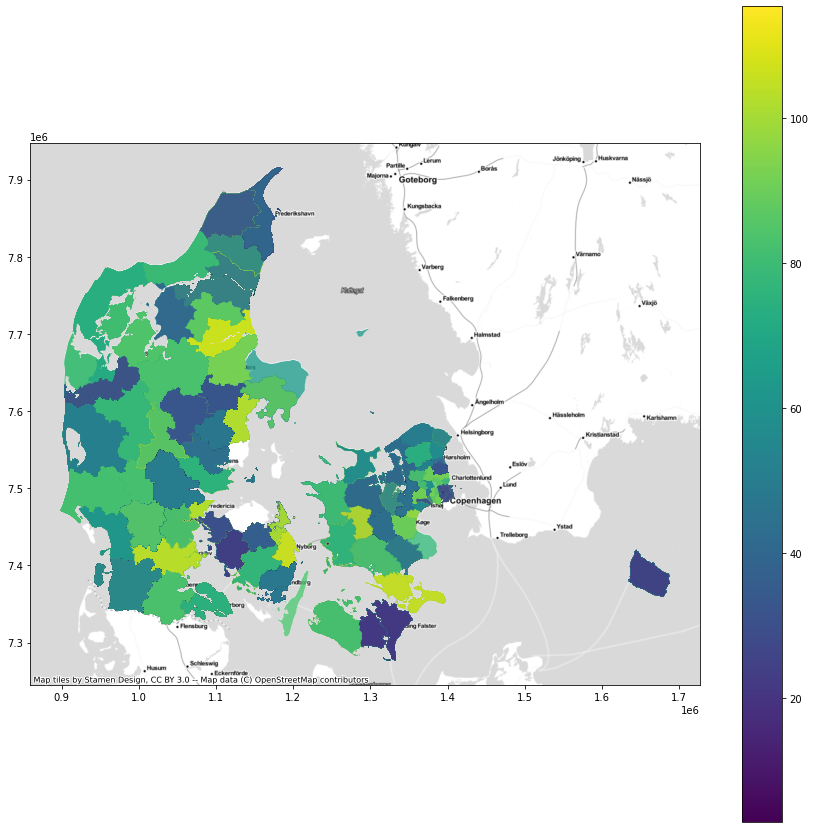

In [9]:
ax = mu_no.plot(figsize=(15, 15), alpha=0.8, edgecolor=None, column="noise", legend="True")
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

**Adding psychiatrics data**

In [11]:
#load again psy data
mun_data=pd.read_excel("https://github.com/CALDISS-AAU/sdsphd20/raw/master/datasets/spatialdata.xlsx")
mun_data.head()

omr  alt2016  psyk2016  psykratio
0      København    64735      1326   0.020484
1  Frederiksberg    12364       258   0.020867
2         Dragør     1746        54   0.030928
3         Tårnby     5614       158   0.028144
4    Albertslund     3686        76   0.020619

In [15]:
#merge datasets because excel file has no geospatiality
mun_fun = mu_no.merge(mun_data, left_on='KOMNAVN', right_on="omr", how='left')
mun_fun.head()

index_left DATAEJER  VEJBESTYRE      VEJNR VEJDEL       VEJNAVN  KILOMETER  \
0      3483.0      580       580.0  5191035.0      1      Bytoften        0.0   
1       106.0      580       580.0  5194079.0      0  Krusmøllevej        0.0   
2      5396.0      580       580.0  5197220.0      0    Strandgade        0.0   
3       103.0      580       580.0  5197220.0      0    Strandgade        0.0   
4      2729.0      580       580.0   500520.0      0  Flensborgvej        3.0   

   METER   LOKATION  KOMMUNE  ...  DQ_POSACLV  TIMEOF_CRE  TIMEOF_PUB  \
0   95.0     Bovrup    580.0  ...        None  2020-06-09  2020-06-09   
1  950.0  Krusmølle    580.0  ...        None  2020-06-09  2020-06-09   
2  450.0  Krusmølle    580.0  ...        None  2020-06-09  2020-06-09   
3  125.0  Krusmølle    580.0  ...        None  2020-06-09  2020-06-09   
4  350.0    Styrtom    580.0  ...        None  2020-06-09  2020-06-09   

   TIMEOF_REV  TIMEOF_EXP  noise       omr  alt2016  psyk2016  psykratio  
0        None  2020-11-07    NaN  Aabenraa   7016.0     109.0   0.015536  
1        None  2020-11-07    NaN  Aabenraa   7016.0     109.0   0.015536  
2        None  2020-11-07    NaN  Aabenraa   7016.0     109.0   0.015536  
3        None  2020-11-07    NaN  Aabenraa   7016.0     109.0   0.015536  
4        None  2020-11-07   64.6  Aabenraa   7016.0     109.0   0.015536  

[5 rows x 65 columns]

In [19]:
mun_fun['avgstoej'] = mun_fun['GNSHAST071'].groupby(mun_fun['KOMMUNE']).transform('mean')

Text(1077.2181818181816, 0.5, 'Latitude')

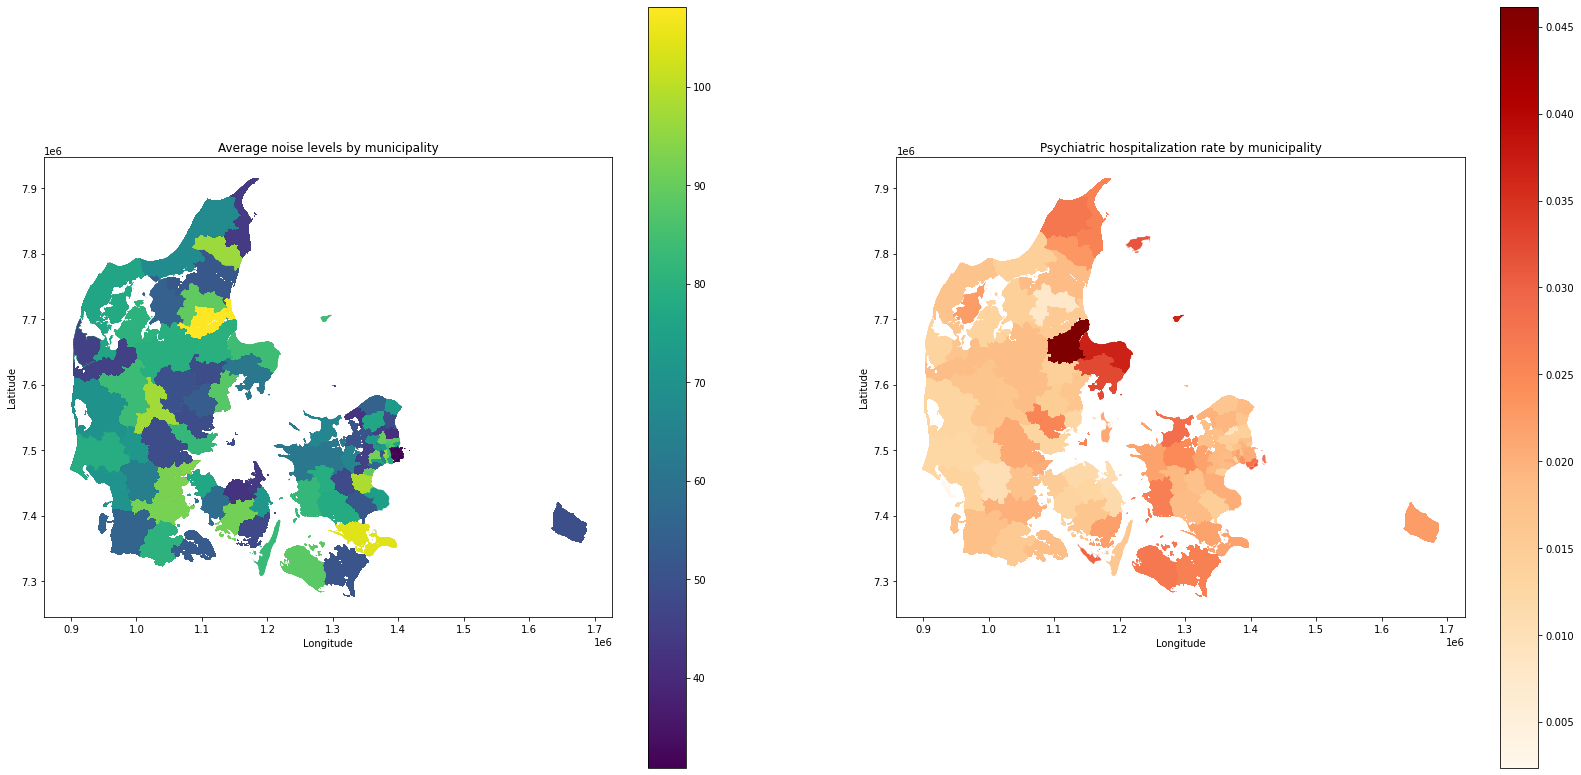

In [20]:
# From jacobo
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (28, 14))
mun_fun.plot(column="avgstoej", legend="True", ax = ax1)
ax1.set_title('Average noise levels by municipality')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
mun_fun.plot(column="psykratio", legend="True", cmap='OrRd', ax = ax2)
ax2.set_title('Psychiatric hospitalization rate by municipality')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')

# Portfolio assignments for Thursday

**Requirement:** Work on solutions for the "Trump vs. GPT-2" assignment

## NLP: Trump vs. GPT-2

The site [https://faketrump.ai/](https://faketrump.ai/) WAS an interesting example of AI-powered fake-text generation. They wrote in 2019:

>We built an artificial intelligence model by fine-tuning [GPT-2](https://openai.com/blog/better-language-models/) to generate tweets in the style of Donald Trump’s Twitter account. After seeing the results, we also built a discriminator that can accurately detect fake tweets 77% of the time — think you can beat our classifier? Try it yourself!

Unfortunately, they decided to take down the site and the dataset.

GPT-2 is a neural transformer-based model, that has been announced by OpenAI in February 2019 and created considerable discussion because they decided - in contrast to their earlier policies - not to release the mode to the public. Their central argument was that the model could be used to produce fake news, spam and alike too easily. The footnote of the faketrump page reads: “Generating realistic fake text has become much more accessible. We hope to highlight the current state of text generation to demonstrate how difficult it is to discern fiction from reality.”


Since then several organizations and researchers have shown that it is [possible to develop systems to detect “fake text”](https://www.theguardian.com/technology/2019/jul/04/ai-fake-text-gpt-2-concerns-false-information). We believe that you too can implement a competitive system.

Having no dataset from that project, Roman decided to retrain GPT2 to generate new fake trump tweets. If they can do that, we can do that! However, it seems as if it is easier for ML models to identify our fake tweets...well...they are an AI company and probably spent more time on that...

> I’ve just watched Democrats scream over and over again about trying to Impeach the President of the United States. The Impeachment process is a sham.

> The Media must understand!“The New York Times is the leader on a very important subject: How to Combat Trump.” @foxandfriendsSo pathetic! @foxandfriendsI don’t think so.

> He is going to do it soon, and with proper borders. Border security is my top priority.The Democrats have failed the people of Arizona in everything else they have done, even their very good immigration laws. They have no sense.

The data can be found [here](https://github.com/SDS-AAU/SDS-master/raw/e2c959494d53859c1844604bed09a28a21566d0f/M3/assignments/trump_vs_GPT2.gz) and has the following format:


<table>
  <tr>
   <td>0
   </td>
   <td>1
   </td>
  </tr>
  <tr>
   <td>string
   </td>
   <td>boolean
   </td>
  </tr>
</table>

There are 7368 real Trump tweet and 7368 fake ones.

you can open it with:



```
data = pd.read_json('https://github.com/SDS-AAU/SDS-master/raw/e2c959494d53859c1844604bed09a28a21566d0f/M3/assignments/trump_vs_GPT2.gz')
```



* Split the data and preprocess it, vectorizing the text using different approaches (BoW, TFIDF, LSI)

* Create a system that can identify the fake Trump tweets using LogisticRefression or other classifiers (Sklearn - If you like also more complex models with FastAI, Keras neural nets or alike)

* Explore a subset (~1000) of the real and fake tweets using LDA and visualize your exploration

* Consider exploring using a different approach (LSI + clustering) or perhaps even [CorEx](https://github.com/gregversteeg/corex_topic)

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_json('https://github.com/SDS-AAU/SDS-master/raw/e2c959494d53859c1844604bed09a28a21566d0f/M3/assignments/trump_vs_GPT2.gz')
data.head()

0     1
0  I was thrilled to be back in the Great city of...  True
1  The Unsolicited Mail In Ballot Scam is a major...  True
2  As long as I am President, I will always stand...  True
3  Our Economy is doing great, and is ready to se...  True
4  If I do not sound like a typical Washington po...  True

In [3]:
data.iloc[0,0] # Inspecting a single tweet

'I was thrilled to be back in the Great city of Charlotte, North Carolina with thousands of hardworking American Patriots who love our Country, cherish our values, respect our laws, and always put AMERICA FIRST!'

**Split the data and preprocess (from migcha)**

In [4]:
# module to split data into training / test
from sklearn.model_selection import train_test_split

In [5]:
# define in and outputs

X = data[0].values
y = data[1].values

In [6]:
# Split the data in 80% trainig 20% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

In [7]:
# Simple BoW vectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vec_1 = vectorizer.fit_transform(X_train)

In [8]:
# Instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)

In [9]:
# Train the model

model.fit(X_train_vec_1, y_train)

LogisticRegression(max_iter=2000)

In [10]:
# Transform the test-set
X_test_vec_1 = vectorizer.transform(X_test)

In [11]:
# Predict on new data

y_pred = model.predict(X_test_vec_1)
y_pred

array([False,  True, False, ..., False,  True,  True])

In [12]:
# confusion matrix by hand... :-)

pd.crosstab(y_test, y_pred)

col_0  False  True 
row_0              
False   1180    309
True     262   1197

In [13]:
# Using TFIDF

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vec_2 = vectorizer.fit_transform(X_train)

model = LogisticRegression(max_iter=2000)

# Train the model

model.fit(X_train_vec_2, y_train)

# Transform the test-set
X_test_vec_2 = vectorizer.transform(X_test)

# Check performance of the model
model.score(X_test_vec_2, y_test)

0.8171641791044776

In [15]:
import eli5
eli5.show_weights(model, feature_names=vectorizer.get_feature_names(), target_names=['Fake','Actual'], top=20)

C:\Users\kgk\.conda\envs\tm\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\kgk\.conda\envs\tm\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [16]:
eli5.show_prediction(model, X_test[0], vec=vectorizer, target_names=['Fake','Actual'])

**3. Explore subset of real and fake tweets using LDA (from jonasgr)**

In [17]:
# We load the data again as a new dataframe for clarity
reports = pd.read_json('https://github.com/SDS-AAU/SDS-master/raw/e2c959494d53859c1844604bed09a28a21566d0f/M3/assignments/trump_vs_GPT2.gz')

In [18]:
# We start by importing spacy that contains a small english language model
import spacy
nlp = spacy.load("en_core_web_sm")

In [19]:
# import LDAvis
import pyLDAvis.gensim
%matplotlib inline
pyLDAvis.enable_notebook()

In [20]:
# We look at the data info
reports.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14736 entries, 0 to 14735
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       14736 non-null  object
 1   1       14736 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 244.6+ KB


In [21]:
# I asign headers instead of numbers
reports.columns = ['tweets','real']

In [22]:
# Choose first 1000 tweets for the analysis
reports_reduc = reports[:1000]

In [23]:
# Convert to dataframe
reports_reduc = pd.DataFrame(reports_reduc)

In [24]:
reports_reduc.info

<bound method DataFrame.info of                                                 tweets  real
0    I was thrilled to be back in the Great city of...  True
1    The Unsolicited Mail In Ballot Scam is a major...  True
2    As long as I am President, I will always stand...  True
3    Our Economy is doing great, and is ready to se...  True
4    If I do not sound like a typical Washington po...  True
..                                                 ...   ...
995  “Judge Jackson now has a request for a new tri...  True
996  I was honored to be back in Georgia with a tru...  True
997  ...And I look at them as a bunch of well funde...  True
998  The White House Press Conference will take pla...  True
999  These were Mueller prosecutors, and the whole ...  True

[1000 rows x 2 columns]>

In [25]:
# reindec
reports_reduc.index = range(len(reports_reduc))

In [26]:
# now, let's combine everything that we learned about preprocessing 

tokens = []

for summary in nlp.pipe(reports_reduc['tweets']):
  proj_tok = [token.lemma_.lower() for token in summary if token.pos_ in ['NOUN', 'PROPN', 'ADJ', 'ADV'] and not token.is_stop] 
  tokens.append(proj_tok)

In [27]:
# Let's bring the tokens back in

reports_reduc['tokens'] = tokens

In [28]:
# Look at tokens or terms for specific tweets after preprocess procedure
reports_reduc['tokens'][5]

['year',
 'betrayal',
 'politician',
 'joe',
 'biden',
 'american',
 'workers',
 'turn',
 'life',
 'million',
 'american',
 'family',
 'family',
 'million',
 'dollar']

In [29]:
# We import the dictionary builder
from gensim.corpora.dictionary import Dictionary

C:\Users\kgk\.conda\envs\tm\lib\site-packages\botocore\vendored\requests\packages\urllib3\_collections.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, MutableMapping
C:\Users\kgk\.conda\envs\tm\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
C:\Users\kgk\.conda\envs\tm\lib\site-packages\gensim\models\doc2vec.py:73: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import namedtuple, defaultdict, Iterable


In [30]:
# We create a Dictionary from the tweets: dictionary
dictionary = Dictionary(reports_reduc['tokens'])

In [31]:
# filter out low-frequency / high-frequency stuff, also limit the vocabulary to max 1000 words
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)

In [32]:
# construct corpus using this dictionary
corpus = [dictionary.doc2bow(doc) for doc in reports_reduc['tokens']]

In [33]:
# That's how the corpus looks
corpus[3][:10]

[(5, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)]

In [34]:
# we'll use the faster multicore version of LDA

from gensim.models import LdaMulticore

In [35]:
# Training the model
lda_model = LdaMulticore(corpus, id2word=dictionary, num_topics=10, workers = 4, passes=10)

In [36]:
# We check out the topics
lda_model.print_topics(-1)

[(0,
  '0.040*"amp" + 0.036*"biden" + 0.032*"big" + 0.027*"left" + 0.026*"democrat" + 0.024*"week" + 0.022*"far" + 0.022*"joe" + 0.022*"vote" + 0.016*"radical"'),
 (1,
  '0.036*"year" + 0.026*"great" + 0.025*"house" + 0.021*"history" + 0.020*"ago" + 0.020*"ballot" + 0.016*"friend" + 0.015*"p.m." + 0.014*"pennsylvania" + 0.014*"member"'),
 (2,
  '0.035*"mike" + 0.033*"mini" + 0.024*"law" + 0.024*"u.s." + 0.022*"bloomberg" + 0.022*"election" + 0.020*"trump" + 0.019*"president" + 0.018*"debate" + 0.016*"voter"'),
 (3,
  '0.060*"states" + 0.053*"united" + 0.043*"court" + 0.034*"supreme" + 0.032*"new" + 0.026*"john" + 0.021*"amp" + 0.021*"federal" + 0.017*"great" + 0.017*"nation"'),
 (4,
  '0.043*"amp" + 0.033*"border" + 0.028*"politician" + 0.027*"biden" + 0.025*"trump" + 0.022*"high" + 0.021*"bill" + 0.019*"poll" + 0.018*"american" + 0.018*"washington"'),
 (5,
  '0.065*"news" + 0.058*"fake" + 0.043*"new" + 0.027*"media" + 0.026*"trump" + 0.023*"york" + 0.023*"china" + 0.022*"amp" + 0.022*

In [37]:
# We can also explore where a text belong to? # Text five belongs mostly to topic 5 it seems that is about sleepy joe biden tweets. And a litte about topic 2.
lda_model[corpus][5]

[(7, 0.9307552)]

In [38]:
# Lets have a closer look # that seems about right looking at the initial tweet
reports_reduc['tweets'][5]

'...For years, I watched one betrayal after another, as politicians like Joe Biden sold out American Workers at every turn—shattering the lives of millions of American families while THEIR families raked in millions of dollars...'

In [39]:
# Let's try to visualize the topics
lda_display = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)

In [40]:
# Let's Visualize
pyLDAvis.display(lda_display)

In [41]:
# Here we get the topic-number that's ranked highest (topic 9)

print(sorted([(2, 0.121567), (9, 0.8610384)], key=lambda x: -x[1]))
print(sorted([(2, 0.121567), (9, 0.8610384)], key=lambda x: -x[1])[0][0])

[(9, 0.8610384), (2, 0.121567)]
9


**4. Exploring using different approach (from gabros)**

In [42]:
from gensim.models.tfidfmodel import TfidfModel
tfidf = TfidfModel(corpus)
tfidf_corpus = tfidf[corpus]

In [43]:
from gensim.models.lsimodel import LsiModel
lsi = LsiModel(tfidf_corpus, id2word=dictionary, num_topics=100)
print(lsi)

LsiModel(num_terms=422, num_topics=100, decay=1.0, chunksize=20000)


In [44]:
lsi_corpus = lsi[tfidf_corpus]

In [45]:
from gensim.similarities import MatrixSimilarity
document_topic_matrix = MatrixSimilarity(lsi_corpus)
document_topic_matrix_ix = document_topic_matrix.index


In [50]:
import umap
embeddings = umap.UMAP(n_neighbors=15, metric='cosine').fit_transform(document_topic_matrix_ix)

from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters = 10)
clusterer.fit(document_topic_matrix_ix)

KMeans(n_clusters=10)

C:\Users\kgk\.conda\envs\tm\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


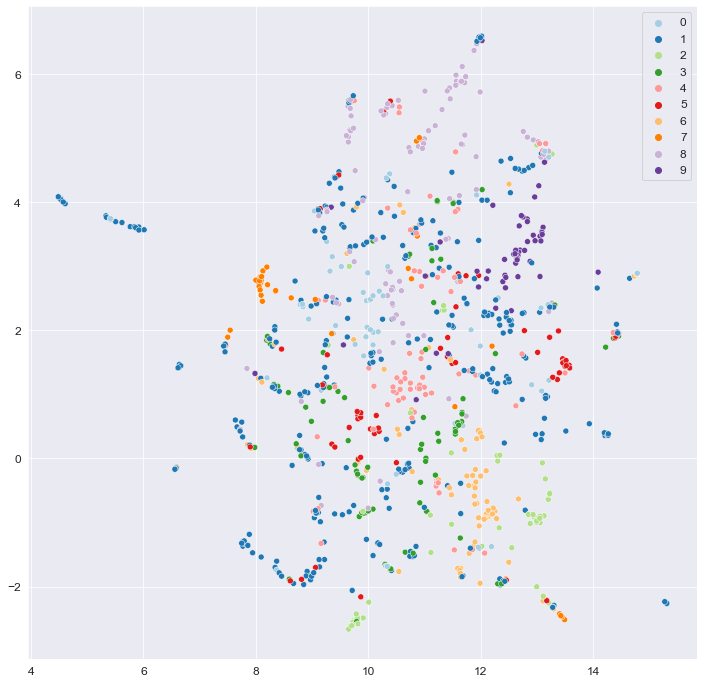

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting things
sns.set_style("darkgrid")

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(12,12))
g = sns.scatterplot(*embeddings.T,
                    #reduced[:,0],reduced[:,1],
                   hue=clusterer.labels_,
                    palette="Paired",
                   legend='full')

In [52]:
reports_reduc['cluster'] = clusterer.labels_

In [55]:
reports_reduc[reports_reduc['cluster'] == 2]['tweets']

1      The Unsolicited Mail In Ballot Scam is a major...
8      Pennsylvania Ballot “mistakes” made, in my opi...
16     “A Pennsylvania Appeals Court turns down the T...
69     This election is a choice between the AMERICAN...
72     Forced to move our Rally tonight in Fayettevil...
77     Sending out 80 MILLION BALLOTS to people who a...
165    How come every time they count Mail-In ballot ...
168    We are winning Pennsylvania big, but the PA Se...
169    .....there was a large number of secretly dump...
170    We have claimed, for Electoral Vote purposes, ...
171    Fmr NV AG Laxalt: ‘No Question‘ Trump Would Ha...
172    All of the recent Biden claimed States will be...
209    All the Radical Left Democrats are trying to d...
250    “Mail-Vote Madness in Pennsylvania - The swing...
260    Great to be in Charlotte, North Carolina as we...
264    READ: Left-wing Radicals Post Online Guide to ...
268    It has been suggested that we should rename as...
288    How can voters be sendin

In [56]:
#seems like this cluster revolves around the word great

In [58]:
#analayize topics per cluster
from gensim.matutils import corpus2dense
import numpy as np

tfidf_matrix = corpus2dense(tfidf_corpus, len(dictionary)).T


for i in set(clusterer.labels_):
  cluster_index = reports_reduc[reports_reduc['cluster'] == i].index
  topk = np.flip(np.argsort(np.sum(tfidf_matrix[cluster_index,:], axis=0)))[:10]

  print(str(i) + str([dictionary[x] for x in topk]))

0['people', 'political', 'great', 'amp', 'guy', 'necessary', 'iran', 'care', 'virginia', 'incredible']
1['federal', 'country', 'coronavirus', 'money', 'government', 'democrat', 'mike', 'washington', 'mini', 'strong']
2['ballot', 'election', 'mail', 'state', 'carolina', 'north', 'fraud', 'pennsylvania', 'voting', 'governor']
3['great', 'american', 'state', 'texas', 'country', 'incredible', 'job', 'america', 'national', 'family']
4['president', 'trump', 'donald', 'america', 'year', 'impeachment', 'policy', 'strong', 'voter', 'supporter']
5['new', 'year', 'york', '%', 'ago', 'economy', 'jersey', 'victory', 'tremendous', 'book']
6['biden', 'joe', 'sleepy', 'vote', 'american', 'left', 'corrupt', 'fracking', 'ban', 'history']
7['states', 'united', 'supreme', 'court', 'world', 'president', 'attack', 'iran', 'amp', 'law']
8['amp', 'democrats', 'impeachment', 'hoax', 'house', 'pelosi', 'senate', 'nancy', 'left', 'radical']
9['news', 'fake', 'media', 'lamestream', 'story', 'campaign', 'big', 'am